## Diego Rodriguez  Start 24/Mar/25

# About Dataset
The data set contains information about all matches and results that took place in Football/Soccer FIFA World Cup 

- fifa_ranking_2022-10-06.csv - teams ranking before Qatar 2022 World Cup.
- matches_1930_2022.csv - table contains all match results from 1930 to 2022.
- world_cup.csv - table includes basic information about each World Cup.

# Table Columns
* home_team, away_team - Home and Away Teams,
* home_score, away_score - Scores,
* home_xg, away_xg - XG,
* home_penalty, away_penalty- Penalties,
* home_manager, away_manager - Managers,
* home_captain, away_captain - Captains,
* home_goal, away_goal - Scorers (Game),
* home_goal_long, away_goal_long - Scorers (+Assistant),
* home_own_goal, away_own_goal - Own Goal Scorers (OG),
* home_penalty_goal, away_penalty_goal - Scorers (Penalty),
* home_penalty_miss_long, away_penalty_miss_long - Miss Penalty (+Miss Reason),
* home_penalty_shootout_miss_long, away_penalty_shootout_miss_long - Miss Penalty(After Game),
* home_penalty_shootout_goal_long, away_penalty_shootout_goal_long- Penalty (After Game),
* home_red_card, away_red_card - Red Cards (Direct),
* home_yellow_red_card, away_yellow_red_card - Red Cards (Second Yellow),
* home_yellow_card_long, away_yellow_card_long - Yellow Cards,
* home_substitute_in_long, away_substitute_in_long - Substitutions,
* Attendance,
* Venue,
* Officials,
* Round,
* Date,
* Score,
* Referee,
* Notes,
* Host,
* Year,

## Questions
- What types of data are available?
- Which data it could be removed?
- Which data Im going to analyze?
- Which data have the most null values? Can I remove them? or Should I fill them in?
- Which libraries should I use?
- What is the goal for analyze this data?


### CRISP-DM (Cross Industry Standard Process for Data Mining)
The CRISP-DM methodology is a well-known framework for data mining projects. It consists of six key stages:
- Business Understanding: Define the goals and requirements of the project.
- Data Understanding: Gather and explore the data to gain insights and identify issues like missing values.
- Data Preparation: Clean, transform, and preprocess the data for analysis or modeling.
- Modeling: Use algorithms (e.g., Random Forest) to create models that address the business problem.
- Evaluation: Assess the model's performance and ensure it meets the objectives.
- Deployment: Implement the model in a real-world environment for practical use.

### *READ DATA*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 3.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


- sklearn.ensemble.RandomForestClassifier: This is a machine learning model from the scikit-learn library. The Random Forest Classifier is used for classification tasks. It's based on the concept of ensemble learning, where multiple decision trees are combined to improve the model's accuracy and reduce overfitting.

- sklearn.impute.SimpleImputer: This tool helps to impute (or fill in) missing values in a dataset. It provides strategies like replacing null values with the mean, median, mode, or a constant value.

- sklearn.preprocessing.OrdinalEncoder: This library is used for encoding categorical variables. The Ordinal Encoder transforms categories into numerical values that retain their ordinal relationship (e.g., "Low" = 1, "Medium" = 2, "High" = 3).

In [5]:
df_ranking = pd.read_csv('fifa_ranking_2022-10-06.csv')
df_matches = pd.read_csv('matches_1930_2022.csv')
df_worldcup = pd.read_csv('world_cup.csv')

In [19]:
## General Vision
df_ranking.sample(5)



,team,team_code,association,rank,previous_rank,points,previous_points
197,Timor-Leste,TLS,AFC,198,199,860.06,860.06
55,Finland,FIN,UEFA,56,59,1405.60,1398.41
57,Bosnia and Herzegovina,BIH,UEFA,58,57,1403.51,1403.98
5,Italy,ITA,UEFA,6,7,1726.14,1713.86
85,Curaçao,CUW,CONCACAF,86,84,1278.64,1293.35


In [7]:
df_matches.sample(5)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
913,Hungary,Sweden,5,NaN,NaN,1,NaN,NaN,Karoly Dietz,György Sárosi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,Brazil,Korea DPR,2,NaN,NaN,1,NaN,NaN,Dunga,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,['88&rsquor;|2:0|Ramires'],NaN,"['73&rsquor;|2:0|Dani Alves|for Elano', '78&rs...",['80&rsquor;|2:0|Kim Kum-il|for Mun In-guk']
147,Algeria,Russia,1,NaN,NaN,1,NaN,NaN,Vahid Halilhodžić,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['39&rsquor;|0:1|Djamel Mesbah', '87&rsquor;|1...","['57&rsquor;|0:1|Dmitri Kombarov', '59&rsquor;...",['71&rsquor;|1:1|Hassan Yebda|for Yacine Brahi...,['46&rsquor;|0:1|Igor Denisov|for Denis Glusha...
833,West Germany,Yugoslavia,1,NaN,NaN,0,NaN,NaN,Sepp Herberger,Hans Schäfer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Netherlands,Spain,0,NaN,NaN,1,NaN,NaN,Bert van Marwijk,NaN,...,NaN,NaN,NaN,NaN,John Heitinga · 109,NaN,"['15&rsquor;|0:0|Robin van Persie', '22&rsquor...","['17&rsquor;|0:0|Carles Puyol', '23&rsquor;|0:...","['71&rsquor;|0:0|Eljero Elia|for Dirk Kuyt', '...","['60&rsquor;|0:0|Jesús Navas|for Pedro', '87&r..."


In [9]:
df_worldcup.sample(5)

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
9,1986,Mexico,24,Argentina,West Germany,Gary Lineker - 6,2394031,46039,52
17,1954,Switzerland,16,Germany,Hungary,Sándor Kocsis - 11,768607,29562,26
10,1982,Spain,24,Italy,West Germany,Paolo Rossi - 6,2109723,40572,52
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
20,1934,Italy,16,Italy,Czechoslovakia,Oldřich Nejedlý - 5,363000,21353,17


------
### Matches DATA

### *Clean DATA*

In [21]:

df_matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [22]:
df_matches.duplicated().sum()

0

In [25]:
df_matches.isnull().sum().sort_values(ascending = False)

home_penalty_miss_long             958
away_penalty_miss_long             955
away_own_goal                      947
home_yellow_red_card               941
home_penalty_shootout_miss_long    940
away_penalty_shootout_miss_long    934
away_yellow_red_card               933
home_penalty_shootout_goal_long    930
away_penalty_shootout_goal_long    930
home_penalty                       929
away_penalty                       929
home_own_goal                      925
home_red_card                      913
away_red_card                      910
Notes                              891
away_penalty_goal                  880
home_penalty_goal                  848
away_xg                            836
home_xg                            836
away_goal                          393
away_goal_long                     393
home_yellow_card_long              343
away_yellow_card_long              337
away_captain                       320
home_captain                       320
Officials                

In [26]:
df_matches.nunique()

home_team                           82
away_team                           86
home_score                          11
home_xg                             35
home_penalty                         6
away_score                           7
away_xg                             31
away_penalty                         6
home_manager                       329
home_captain                       280
away_manager                       371
away_captain                       334
Attendance                         737
Venue                              205
Officials                          696
Round                               12
Date                               378
Score                               71
Referee                            322
Notes                               23
Host                                17
Year                                22
home_goal                          717
away_goal                          571
home_goal_long                     718
away_goal_long           

In [28]:
### DROP Columns
drop_col = df_matches.columns[df_matches.isnull().sum() > 800]
drop_col


Index(['home_xg', 'home_penalty', 'away_xg', 'away_penalty', 'Notes',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card'],
      dtype='object')

In [30]:
df_matches = df_matches.drop(columns = drop_col)

KeyError: "['home_xg', 'home_penalty', 'away_xg', 'away_penalty', 'Notes', 'home_own_goal', 'away_own_goal', 'home_penalty_goal', 'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long', 'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long', 'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long', 'home_red_card', 'away_red_card', 'home_yellow_red_card', 'away_yellow_red_card'] not found in axis"

In [32]:
# Drop 19-24 columns, first : is for arrows
df_matches = df_matches.drop(df_matches.iloc[:, 19:25].columns, axis=1)


In [58]:
df_matches = df_matches.dropna(subset = "Attendance")

In [33]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   home_team     964 non-null    object
 1   away_team     964 non-null    object
 2   home_score    964 non-null    int64 
 3   away_score    964 non-null    int64 
 4   home_manager  964 non-null    object
 5   home_captain  644 non-null    object
 6   away_manager  964 non-null    object
 7   away_captain  644 non-null    object
 8   Attendance    964 non-null    int64 
 9   Venue         964 non-null    object
 10  Officials     709 non-null    object
 11  Round         964 non-null    object
 12  Date          964 non-null    object
 13  Score         964 non-null    object
 14  Referee       709 non-null    object
 15  Host          964 non-null    object
 16  Year          964 non-null    int64 
 17  home_goal     718 non-null    object
 18  away_goal     571 non-null    object
dtypes: int64

### *Modeling*

In [59]:
## Sort by Attendance
most_attend = df_matches.sort_values(by = "Attendance", ascending = False).head(10)
least_attend = df_matches.sort_values(by = "Attendance", ascending = True).head(10)

In [63]:

## Select Columns
columns_to_show = ['home_team', 'away_team', 'home_score', 'away_score', 'Date', 'Round', 'Year', 'Attendance']
most_attended = most_attend[columns_to_show]
least_attended = least_attend[columns_to_show]

print("Most Attended Matches:")
print(most_attended)
print("\nLeast Attended Matches:")
print(least_attended)

Most Attended Matches:
     home_team     away_team  home_score  away_score        Date  \
890    Uruguay        Brazil           2           1  1950-07-16   
891     Brazil         Spain           6           1  1950-07-13   
900     Brazil    Yugoslavia           2           0  1950-07-01   
893     Brazil        Sweden           7           1  1950-07-09   
583     Mexico      Paraguay           1           1  1986-06-07   
552  Argentina  West Germany           3           2  1986-06-29   
556  Argentina       England           2           1  1986-06-22   
566     Mexico      Bulgaria           2           0  1986-06-15   
555  Argentina       Belgium           2           0  1986-06-25   
595    Belgium        Mexico           1           2  1986-06-03   

              Round  Year  Attendance  
890     Final stage  1950      173850  
891     Final stage  1950      152772  
900     Group stage  1950      142429  
893     Final stage  1950      138886  
583     Group stage  1986   

ValueError: cannot convert float NaN to integer

<Figure size 1400x1000 with 0 Axes>

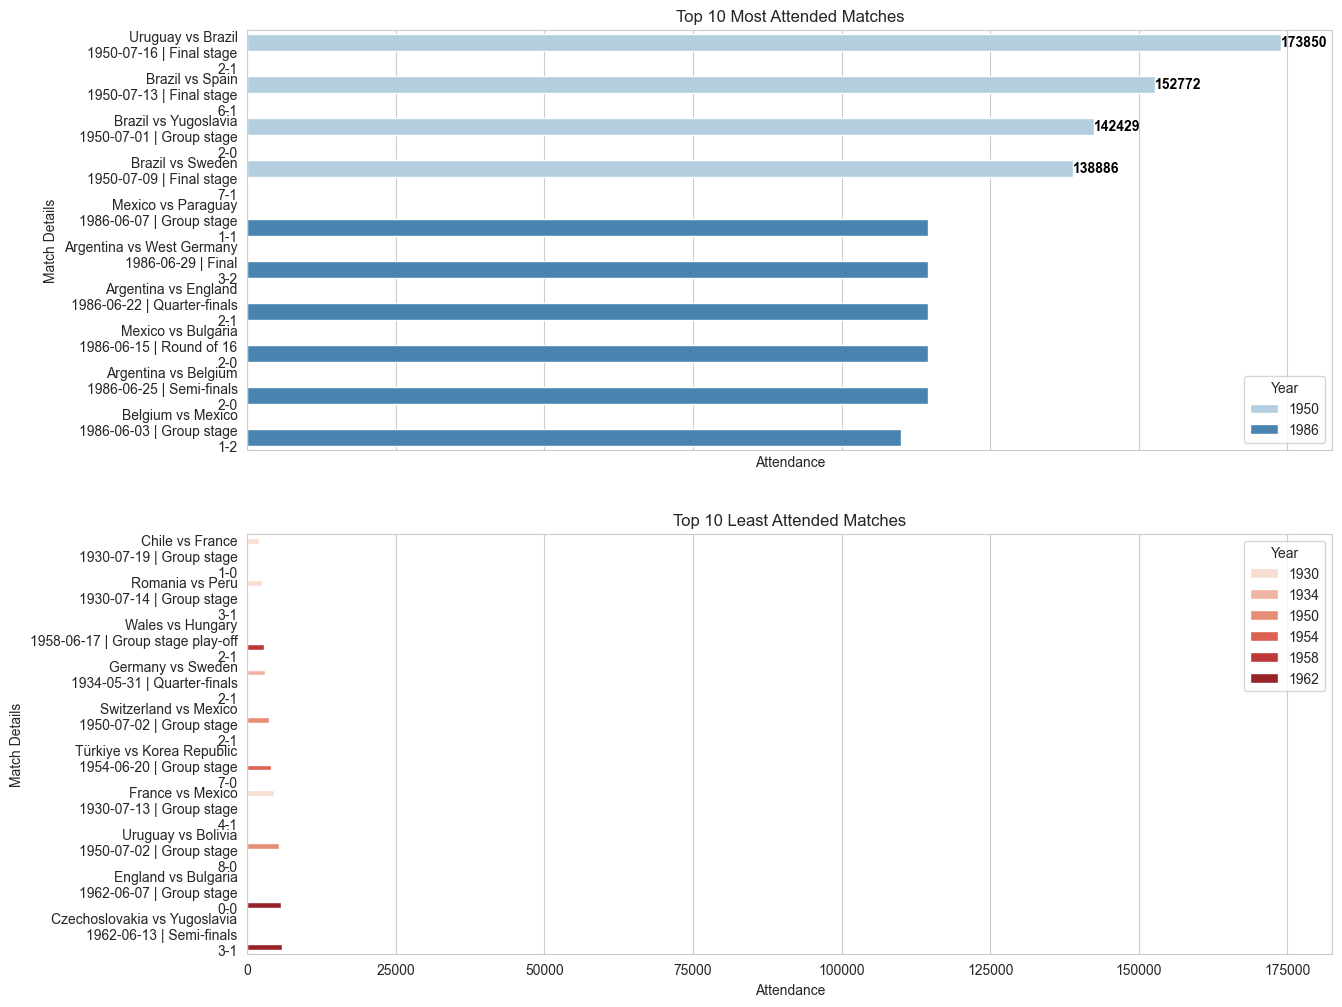

In [61]:
# Visualization
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot Most Attended Matches
g1 = sns.barplot(
    data=most_attended,
    x='Attendance',
    y=most_attended['home_team'] + ' vs ' + most_attended['away_team'] + '\n' + 
      most_attended['Date'] + ' | ' + most_attended['Round'] + '\n' + 
      most_attended['home_score'].astype(str) + '-' + most_attended['away_score'].astype(str),
    hue='Year',
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title("Top 10 Most Attended Matches")
axes[0].set_ylabel("Match Details")
axes[0].set_xlabel("Attendance")
axes[0].legend(title='Year')

# Plot Least Attended Matches
g2 = sns.barplot(
    data=least_attended,
    x='Attendance',
    y=least_attended['home_team'] + ' vs ' + least_attended['away_team'] + '\n' + 
      least_attended['Date'] + ' | ' + least_attended['Round'] + '\n' + 
      least_attended['home_score'].astype(str) + '-' + least_attended['away_score'].astype(str),
    hue='Year',
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title("Top 10 Least Attended Matches")
axes[1].set_ylabel("Match Details")
axes[1].set_xlabel("Attendance")
axes[1].legend(title='Year')

# Add exact attendance numbers to bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()